In [1]:
# importing basic library:
import numpy as np
import pandas as pd 

# for visualizattion:
import matplotlib.pyplot as plt
import seaborn as sns

# for ignoring warnings:
import warnings
warnings.filterwarnings("ignore")

# for preprocessing:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# for handling sknewness
from scipy.stats import skew

# for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# for splitting data and Cross-validation:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# for predictive modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import statsmodels.formula.api as sm

import statsmodels.api as stm

import scipy.stats as stats

from sklearn.linear_model import SGDRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor

from xgboost import XGBRegressor

# Evaluation matrix
from sklearn.metrics import r2_score, mean_squared_error

#importing pickle for saving model
import pickle

In [2]:
# importing ipl dataset:
df=pd.read_csv(r"C:\Users\Vishal\Web Deployment\IPL Score Prediction\data\exported_data\EncodedData.csv",
               index_col=0,
               header=0)

print(df.shape)

df.head(10)

(40108, 10)


,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,13,3,6,61,0,5.1,59,0,222
33,2008-04-18,13,3,6,61,1,5.2,59,1,222
34,2008-04-18,13,3,6,61,1,5.3,59,1,222
35,2008-04-18,13,3,6,61,1,5.4,59,1,222
36,2008-04-18,13,3,6,61,1,5.5,58,1,222
37,2008-04-18,13,3,6,61,1,5.6,58,1,222
38,2008-04-18,13,3,6,62,1,6.1,55,1,222
39,2008-04-18,13,3,6,63,1,6.2,52,1,222
40,2008-04-18,13,3,6,64,1,6.3,47,1,222
41,2008-04-18,13,3,6,66,1,6.4,45,1,222


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40108 entries, 32 to 75888
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            40108 non-null  object 
 1   venue           40108 non-null  int64  
 2   bat_team        40108 non-null  int64  
 3   bowl_team       40108 non-null  int64  
 4   runs            40108 non-null  int64  
 5   wickets         40108 non-null  int64  
 6   overs           40108 non-null  float64
 7   runs_last_5     40108 non-null  int64  
 8   wickets_last_5  40108 non-null  int64  
 9   total           40108 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 3.4+ MB


In [4]:
#Converting the column 'date' from string to datetime object:  
df['date']=pd.to_datetime(df['date'])

In [5]:
train=df[df['date']<'2017-01-01']

test=df[df['date']>='2017-01-01']

In [6]:
print(train.shape)
print(test.shape)

(37330, 10)
(2778, 10)


In [7]:
#Dropping 'date'columns from train and test
train=train.drop('date',axis=1)

test=test.drop('date',axis=1)

In [8]:
print(train.shape)

print(test.shape)

(37330, 9)
(2778, 9)


In [9]:
train.head()

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,13,3,6,61,0,5.1,59,0,222
33,13,3,6,61,1,5.2,59,1,222
34,13,3,6,61,1,5.3,59,1,222
35,13,3,6,61,1,5.4,59,1,222
36,13,3,6,61,1,5.5,58,1,222


In [10]:
test.head()

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
68894,21,7,6,46,1,5.1,42,1,207
68895,21,7,6,50,1,5.2,46,1,207
68896,21,7,6,50,1,5.3,44,1,207
68897,21,7,6,54,1,5.4,48,1,207
68898,21,7,6,58,1,5.5,51,1,207


In [11]:
#Futher Splitting data into X_train,X_test,Y_train,Y_test:
X_train=train.iloc[:,:-1]
Y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
Y_test=test.iloc[:,-1]

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(37330, 8) (37330,) (2778, 8) (2778,)


In [12]:
X=df.iloc[:,0:-1]
Y=df['total']

## Linear Regression

In [13]:
X_train=train.iloc[:,:-1]
Y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
Y_test=test.iloc[:,-1]

In [14]:
model_linear = LinearRegression()
model_linear.fit(X_train,Y_train)
LM=model_linear.predict(X_test)

print(r2_score(Y_test,LM))
print(np.sqrt(mean_squared_error(Y_test,LM)))
print(1 - (1-(r2_score(Y_test,LM)))*(len(Y)-1)/(len(Y)-X.shape[1]-1))

0.7475672874410679
15.99268590091792
0.747510628894182


## Ridge

In [15]:
X_train=train.iloc[:,:-1]
Y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
Y_test=test.iloc[:,-1]

In [16]:
model_ridge = Ridge()
model_ridge.fit(X_train,Y_train)
RM=model_ridge.predict(X_test)

print(r2_score(Y_test,RM))
print(np.sqrt(mean_squared_error(Y_test,RM)))
print(1 - (1-(r2_score(Y_test,RM)))*(len(Y)-1)/(len(Y)-X.shape[1]-1))

0.7475668653312295
15.992699272139049
0.7475102066896011


## Lasso

In [17]:
X_train=train.iloc[:,:-1]
Y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
Y_test=test.iloc[:,-1]

In [18]:
model_lasso = Lasso()
model_lasso.fit(X_train,Y_train)
LS=model_lasso.predict(X_test)

print(r2_score(Y_test,LS))
print(np.sqrt(mean_squared_error(Y_test,LS)))
print(1 - (1-(r2_score(Y_test,LS)))*(len(Y)-1)/(len(Y)-X.shape[1]-1))

0.7409973596566748
16.199465541020277
0.7409392264888587


## OLS

In [19]:
X_train=train.iloc[:,:-1]
Y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
Y_test=test.iloc[:,-1]

In [20]:
new_df=pd.DataFrame()
new_df=X_train

new_df["total"]=Y_train
new_df.shape

(37330, 9)

In [21]:
ols_models = sm.ols(formula='total ~ venue + bat_team + bowl_team + runs + wickets + overs + runs_last_5 + wickets_last_5', 
                    data=new_df).fit()
print(ols_models.params)
print(ols_models.summary())

Intercept         163.766616
venue               0.053128
bat_team            0.206536
bowl_team          -0.090491
runs                0.956933
wickets            -4.864976
overs              -6.341191
runs_last_5         0.013434
wickets_last_5     -1.221225
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     8312.
Date:                Mon, 20 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:50:30   Log-Likelihood:            -1.6039e+05
No. Observations:               37330   AIC:                         3.208e+05
Df Residuals:                   37321   BIC:                         3.209e+05
Df Model:                           8                                         
Covariance Ty

In [22]:
OLS=ols_models.predict(X_test)

print(r2_score(Y_test,OLS))
print(np.sqrt(mean_squared_error(Y_test,OLS)))
print(1 - (1-(r2_score(Y_test,OLS)))*(len(Y)-1)/(len(Y)-X.shape[1]-1))

0.7475672874410682
15.992685900917914
0.7475106288941823


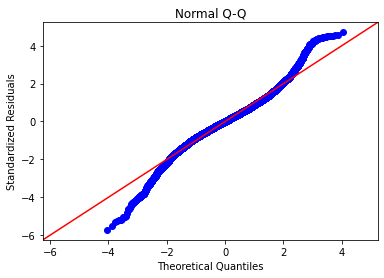

In [23]:
## Quantile-Quantile plots
res = ols_models.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res,  fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show() 

## SGD

In [24]:
X_train=train.iloc[:,:-1]
Y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
Y_test=test.iloc[:,-1]

In [25]:
regressor_SGD=SGDRegressor(learning_rate="constant",eta0=0.01,shuffle=True,random_state=10,max_iter=1000,early_stopping=True,n_iter_no_change=5)
regressor_SGD.fit(X_train,Y_train)
SGD=regressor_SGD.predict(X_test)

print(r2_score(Y_test,SGD))
print(np.sqrt(mean_squared_error(Y_test,SGD)))
print(1 - (1-(r2_score(Y_test,LS)))*(len(Y)-1)/(len(Y)-X.shape[1]-1))

-2.824466089919468e+25
169167438429867.47
0.7409392264888587


In [26]:
regressor_SGD=SGDRegressor(learning_rate="constant",eta0=0.00001,shuffle=True,random_state=10,max_iter=100000,early_stopping=True,n_iter_no_change=400)
regressor_SGD.fit(X_train,Y_train)
SGD=regressor_SGD.predict(X_test)

print(r2_score(Y_test,SGD))
print(np.sqrt(mean_squared_error(Y_test,SGD)))
print(1 - (1-(r2_score(Y_test,LS)))*(len(Y)-1)/(len(Y)-X.shape[1]-1))

0.7456459635175157
16.053432551653685
0.7409392264888587


## KNN

In [27]:
X_train=train.iloc[:,:-1]
Y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
Y_test=test.iloc[:,-1]

In [28]:
model_KNN=KNeighborsRegressor(n_neighbors=int(np.sqrt(len(X_train))),metric='euclidean')
model_KNN.fit(X_train,Y_train)
KNN=model_KNN.predict(X_test)

print(r2_score(Y_test,KNN))
print(np.sqrt(mean_squared_error(Y_test,KNN)))
print(1 - (1-(r2_score(Y_test,LS)))*(len(Y)-1)/(len(Y)-X.shape[1]-1))

0.507425089280132
22.340080530515287
0.7409392264888587


In [29]:
int(np.sqrt(len(X_train)))

193

In [30]:
model_KNN_tune=KNeighborsRegressor(n_neighbors=60,metric='euclidean')
model_KNN_tune.fit(X_train,Y_train)
KNN=model_KNN_tune.predict(X_test)

print(r2_score(Y_test,KNN))
print(np.sqrt(mean_squared_error(Y_test,KNN)))
print(1 - (1-(r2_score(Y_test,LS)))*(len(Y)-1)/(len(Y)-X.shape[1]-1))

0.540671415254615
21.572989257188272
0.7409392264888587


## Decision Tree

In [31]:
X_train=train.iloc[:,:-1]
Y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
Y_test=test.iloc[:,-1]

In [32]:
model_DT=DecisionTreeRegressor(criterion='mse', random_state=10, splitter='best')
model_DT.fit(X_train,Y_train)
DT=model_DT.predict(X_test)

print(r2_score(Y_test,KNN))
print(np.sqrt(mean_squared_error(Y_test,KNN)))
print(1 - (1-(r2_score(Y_test,LS)))*(len(Y)-1)/(len(Y)-X.shape[1]-1))

0.540671415254615
21.572989257188272
0.7409392264888587


## Extra Tree

In [45]:
X_train=train.iloc[:,:-1]
Y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
Y_test=test.iloc[:,-1]

In [44]:
model_EXT= ExtraTreesRegressor(n_estimators=1000, random_state=10)
model_EXT.fit(X_train,Y_train)
EXT= model_EXT.predict(X_test)

print(r2_score(Y_test,EXT))
print(np.sqrt(mean_squared_error(Y_test,EXT)))
print(1 - (1-(r2_score(Y_test,LS)))*(len(Y)-1)/(len(Y)-X.shape[1]-1))

0.6735543444796854
18.186705625550747
0.7409392264888587


## Random Forest

In [46]:
X_train=train.iloc[:,:-1]
Y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
Y_test=test.iloc[:,-1]

In [51]:
model_RF= RandomForestRegressor(n_estimators=100, random_state=10)
model_RF.fit(X_train,Y_train)
RF= model_RF.predict(X_test)

print(r2_score(Y_test,RF))
print(np.sqrt(mean_squared_error(Y_test,RF)))
print(1 - (1-(r2_score(Y_test,LS)))*(len(Y)-1)/(len(Y)-X.shape[1]-1))

0.615682229789124
19.733032158574776
0.7409392264888587


## Adaboost

In [52]:
X_train=train.iloc[:,:-1]
Y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
Y_test=test.iloc[:,-1]

In [59]:
model_AB= AdaBoostRegressor(n_estimators=100, random_state=10)
model_AB.fit(X_train,Y_train)
AB= model_AB.predict(X_test)

print(r2_score(Y_test,AB))
print(np.sqrt(mean_squared_error(Y_test,AB)))
print(1 - (1-(r2_score(Y_test,LS)))*(len(Y)-1)/(len(Y)-X.shape[1]-1))

0.533995244754129
21.72920137961276
0.7409392264888587


In [61]:
model_AB= AdaBoostRegressor(model_ridge, random_state=10)
model_AB.fit(X_train,Y_train)
AB= model_AB.predict(X_test)

print(r2_score(Y_test,AB))
print(np.sqrt(mean_squared_error(Y_test,AB)))
print(1 - (1-(r2_score(Y_test,LS)))*(len(Y)-1)/(len(Y)-X.shape[1]-1))

0.7426670355717748
16.147165707519413
0.7409392264888587


## Gradient Boost

In [70]:
model_GB= GradientBoostingRegressor(n_estimators=600, random_state=10)
model_GB.fit(X_train,Y_train)
GB= model_GB.predict(X_test)

print(r2_score(Y_test,GB))
print(np.sqrt(mean_squared_error(Y_test,GB)))
print(1 - (1-(r2_score(Y_test,LS)))*(len(Y)-1)/(len(Y)-X.shape[1]-1))

0.7234275291253633
16.739907947700633
0.7409392264888587


In [97]:
model_XGB= XGBRegressor(n_estimators=20,random_state=10)
model_XGB.fit(X_train,Y_train)
XGB=model_XGB.predict(X_test)

print(r2_score(Y_test,XGB))
print(np.sqrt(mean_squared_error(Y_test,XGB)))
print(1 - (1-(r2_score(Y_test,LS)))*(len(Y)-1)/(len(Y)-X.shape[1]-1))

0.6616227368480203
18.5160854945344
0.7409392264888587


## Ensemble

In [105]:
estimators = []

model1 = LinearRegression()
estimators.append(('Lr', model1))
                  
model2 = Ridge()
estimators.append(('Rg', model2))

model3 = Lasso()
estimators.append(('Ls', model3))

# model4 = sm.ols(formula='total ~ venue + bat_team + bowl_team + runs + wickets + overs + runs_last_5 + wickets_last_5', data=new_df).fit()
# estimators.append(('Ols', model4))

model5 = SGDRegressor(learning_rate="constant",eta0=0.00001,shuffle=True,random_state=10,max_iter=100000,early_stopping=True,n_iter_no_change=400)
estimators.append(('Sgd', model5))

model6 = GradientBoostingRegressor(n_estimators=600, random_state=10)
estimators.append(('Gb', model6))                  

# create the ensemble model
model_ensemble = VotingRegressor(estimators)
model_ensemble.fit(X_train,Y_train)
EM=model_ensemble.predict(X_test)

print()
print(r2_score(Y_test,EM))
print(np.sqrt(mean_squared_error(Y_test,EM)))
print(1 - (1-(r2_score(Y_test,LS)))*(len(Y)-1)/(len(Y)-X.shape[1]-1))


0.755727623843733
15.732066342428244
0.7409392264888587
